In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Training-data-_1_.csv")

In [3]:
data.head()


,internet,sex,traveltime,studytime,freetime,absences,age,iq,marks
0,no,M,2,2,5,6,18,118,73.13
1,yes,M,2,2,2,7,19,107,67.78
2,yes,M,3,3,3,5,18,108,70.84
3,no,F,3,3,4,9,17,100,66.68
4,yes,M,1,4,3,4,19,96,71.88


In [4]:
x_train = np.array(data.iloc[:,0:8])
y_train = np.array(data.iloc[:,8]).reshape(-1,1)


In [5]:
data.head()

,internet,sex,traveltime,studytime,freetime,absences,age,iq,marks
0,no,M,2,2,5,6,18,118,73.13
1,yes,M,2,2,2,7,19,107,67.78
2,yes,M,3,3,3,5,18,108,70.84
3,no,F,3,3,4,9,17,100,66.68
4,yes,M,1,4,3,4,19,96,71.88


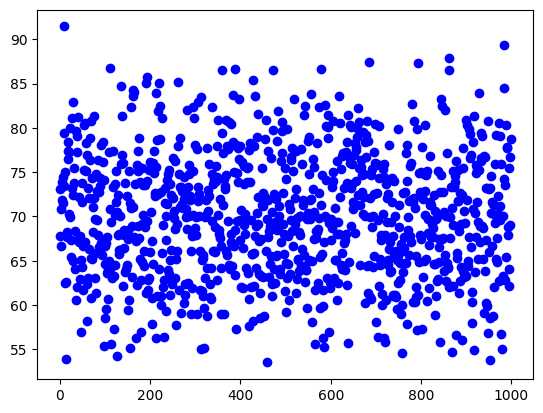

In [6]:
plt.plot(y_train, 'bo')
plt.show()

In [7]:
def feature_changing(x_train):
    x_train=x_train.copy()
    x = pd.DataFrame(x_train)
    x = x.replace({'yes':1, 'no':0 ,'M':1, 'F':0})
    x_train = np.array(x)
    return x_train
x_train = feature_changing(x_train)    
    

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9100\1764090744.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  x = x.replace({'yes':1, 'no':0 ,'M':1, 'F':0})


In [8]:
x_train

array([[  0,   1,   2, ...,   6,  18, 118],
       [  1,   1,   2, ...,   7,  19, 107],
       [  1,   1,   3, ...,   5,  18, 108],
       ...,
       [  1,   1,   2, ...,   5,  17, 123],
       [  1,   0,   1, ...,   8,  17, 104],
       [  1,   1,   1, ...,   6,  18, 128]])

In [9]:
def z_score(x_train):
    x_mean = np.mean(x_train , axis=0)
    x_std = np.std(x_train , axis=0)
    x_std[x_std == 0] = 1 
    x_train = (x_train - x_mean) / x_std 
    return x_train,x_std,x_mean
 

In [10]:
def cost(x_train,y_train,w,b):
     m = x_train.shape[0]
  
     y_pred = np.dot(x_train, w) + b
     loss =  (1 / (2 * m)) * np.sum((y_pred - y_train) ** 2)
     return loss

In [11]:
def gradient_descent(x_train,y_train,w,b,lr=0.01):
    m = x_train.shape[0]
    y_pred= np.dot(x_train, w) + b
    dw = (1/m) * np.dot(x_train.T, (y_pred - y_train))
    db = (1/m) * np.sum(y_pred - y_train)
    w -= lr * dw
    b -= lr * db
    return w, b


In [12]:
x_train = x_train.astype(np.float64)
x_train, x_std, x_mean = z_score(x_train)

np.random.seed(2147483647)
w = np.random.randn(x_train.shape[1],1)
b = np.random.randn(1)

old_cost = 0

while abs(old_cost - cost(x_train,y_train,w,b))>0.00001:
  old_cost = cost(x_train,y_train,w,b)
  w,b = gradient_descent(x_train,y_train,w,b)

x_pred = pd.read_csv('Test data.csv').iloc[:,:8].to_numpy()
x_pred = feature_changing(x_pred)
x_pred = (x_pred - x_mean)/x_std
ans = pd.read_csv('Test data.csv').iloc[:,8].to_numpy()

y_pred= np.dot(x_pred,w) + b

accuracy = 0
for dim in range(len(ans)):
  if abs(y_pred[dim]-ans[dim])<0.5: # do not change the tolerance as you'll be checked on +- 0.5 error only
    accuracy += 1
    accuracy = round(accuracy*100/200.0,2)
ok = 'Congratulations' if accuracy>95 else 'Optimization required'
print(f"{ok}, your accuracy is {accuracy}%")



Optimization required, your accuracy is 0.99%


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9100\1764090744.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  x = x.replace({'yes':1, 'no':0 ,'M':1, 'F':0})
